In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 讀檔(已經預處理的pkl檔)

In [2]:
#Read  data
data = pd.read_pickle("./data/train_data.pkl")
data.head()

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,19,35,17,38,55,18,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,1,8,1,26,6,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,-1,-1,10,9,17,10,-1,5,8,...,12,19,8,-1,3,13,7,82,35.712607,139.779996
3,air_0328696196e46f18,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3,-1,24,-1,19,8,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,25,20,31,12,37,35,2,102,34.692337,135.472229


## Nomalization

把原本data = -1的用0替代，其餘非0的數值利用
$x' = \ln (1+x)$轉換

In [3]:
def log_transform(data):
    data = data.applymap(lambda x: 0 if x==-1 else x)
    data.iloc[:, 1:479] = np.log1p(data.iloc[:, 1:479])
    return data

data = log_transform(data)
data.head(10)

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.995732,3.583519,2.890372,3.663562,4.025352,2.944439,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.098612,0.693147,2.197225,0.693147,3.295837,1.945910,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,0.000000,0.0,2.397895,2.302585,2.890372,2.397895,0.000000,1.791759,2.197225,...,2.564949,2.995732,2.197225,0.000000,1.386294,2.639057,7,82,35.712607,139.779996
3,air_0328696196e46f18,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.386294,0.000000,3.218876,0.000000,2.995732,2.197225,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.258097,3.044522,3.465736,2.564949,3.637586,3.583519,2,102,34.692337,135.472229
5,air_036d4f1ee7285390,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.945910,3.496508,3.970292,2.944439,3.401197,3.178054,2,31,34.799767,135.360073
6,air_0382c794b73b51ad,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,...,3.367296,3.295837,3.135494,3.218876,3.218876,3.713572,2,68,35.602125,139.671958
7,air_03963426c9312048,0.000000,0.0,0.000000,4.143135,3.433987,3.970292,3.637586,4.499810,4.110874,...,3.637586,3.295837,3.178054,3.258097,4.330733,4.060443,7,15,34.386245,132.455018
8,air_04341b588bde96cd,2.397895,0.0,0.000000,3.178054,3.583519,3.526361,3.970292,3.871201,4.276666,...,3.465736,3.555348,3.583519,2.197225,3.871201,3.828641,7,66,35.735623,139.651658
9,air_049f6d5b402a31b2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.197225,2.708050,2.564949,2.833213,2.639057,3.401197,8,0,33.589216,130.392813


# 產生lstm input (shape = # , 39, 821)
因為`sample_submission`檔案裡面只有821個不同的air_data
產生連續39天的資料，前39天當$\mathbf{x}$，後39天當$y$<br>
例如用2016-1-1~2016-2-8作為$\mathbf{x}$ 2016-2-9~2016-3-18作為$y$

In [4]:
def generate_walkforward_data(data, input_seq_len, output_seq_len, date_start_col, date_end_col, val_data=0.05):
    date_cols = np.r_[date_start_col: date_end_col]
    train_points = len(date_cols) - input_seq_len - output_seq_len
    input_seqs = []
    output_seqs = []
    for i in range(train_points+1):
        inp_start = i + date_start_col
        inp_end = inp_start + input_seq_len
        out_end = inp_end + output_seq_len 
        input_seqs.append( data.iloc[: , inp_start:inp_end].values.reshape(1, -1, input_seq_len).transpose(0, 2, 1) )
        output_seqs.append( data.iloc[: , inp_end:out_end].values.reshape(1, -1, output_seq_len).transpose(0, 2, 1) )
        
    input_seqs = np.concatenate(input_seqs)
    output_seqs = np.concatenate(output_seqs)
    
    train_x, val_x, train_y, val_y = train_test_split(input_seqs, output_seqs, test_size=val_data, random_state=1126)
    
    return train_x, val_x, train_y, val_y

In [5]:
input_seq_len = 39
output_seq_len = 39
train_x, val_x, train_y, val_y = generate_walkforward_data(data, input_seq_len, output_seq_len, 1, 479)
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(380, 39, 821) (380, 39, 821) (21, 39, 821) (21, 39, 821)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\fra

In [7]:
def buildManyToManyModel(train_data):
    model = Sequential()
    model.add(LSTM(10, input_shape = (train_data.shape[1], train_data.shape[2]),return_sequences=True))
    model.add(TimeDistributed(Dense(821)))
    model.compile(loss="mse", optimizer="adam")
    return model

In [8]:
model = buildManyToManyModel(train_x)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 39, 10)            33280     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 39, 821)           9031      
Total params: 42,311
Trainable params: 42,311
Non-trainable params: 0
_________________________________________________________________


In [9]:
callback = EarlyStopping(monitor="loss", patience=3, verbose=1, mode="auto")
model.fit(train_x, train_y, epochs=1000, batch_size=50, validation_data=(val_x, val_y), callbacks=[callback])

Instructions for updating:
Use tf.cast instead.
Train on 380 samples, validate on 21 samples
Epoch 1/1000
380/380 [==============================] - 2s 6ms/step - loss: 5.6841 - val_loss: 5.0641
Epoch 2/1000
380/380 [==============================] - 1s 2ms/step - loss: 5.3950 - val_loss: 4.8041
Epoch 3/1000
380/380 [==============================] - 1s 2ms/step - loss: 5.1123 - val_loss: 4.5561
Epoch 4/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.8427 - val_loss: 4.3212
Epoch 5/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.5882 - val_loss: 4.1034
Epoch 6/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.3534 - val_loss: 3.9017
Epoch 7/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.1322 - val_loss: 3.7172
Epoch 8/1000
380/380 [==============================] - 1s 2ms/step - loss: 3.9307 - val_loss: 3.5467
Epoch 9/1000
380/380 [==============================] - 1s 2ms/step - loss: 3.7450 - val_lo

380/380 [==============================] - 1s 2ms/step - loss: 1.2879 - val_loss: 1.2427
Epoch 78/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2816 - val_loss: 1.2365
Epoch 79/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2757 - val_loss: 1.2298
Epoch 80/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2698 - val_loss: 1.2223
Epoch 81/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2631 - val_loss: 1.2153
Epoch 82/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2567 - val_loss: 1.2092
Epoch 83/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2514 - val_loss: 1.2032
Epoch 84/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2463 - val_loss: 1.1975
Epoch 85/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2438 - val_loss: 1.2228
Epoch 86/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2501 - v

380/380 [==============================] - 1s 2ms/step - loss: 1.0472 - val_loss: 0.9320
Epoch 157/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0464 - val_loss: 0.9313
Epoch 158/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0457 - val_loss: 0.9301
Epoch 159/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0449 - val_loss: 0.9297
Epoch 160/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0443 - val_loss: 0.9285
Epoch 161/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0436 - val_loss: 0.9276
Epoch 162/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0429 - val_loss: 0.9269
Epoch 163/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0423 - val_loss: 0.9259
Epoch 164/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0417 - val_loss: 0.9250
Epoch 165/1000
380/380 [==============================] - 1s 2ms/step - loss: 1

Epoch 235/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0078 - val_loss: 0.8891
Epoch 236/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0073 - val_loss: 0.8887
Epoch 237/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0069 - val_loss: 0.8881
Epoch 238/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0064 - val_loss: 0.8877
Epoch 239/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0059 - val_loss: 0.8872
Epoch 240/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0054 - val_loss: 0.8869
Epoch 241/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0049 - val_loss: 0.8864
Epoch 242/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0045 - val_loss: 0.8862
Epoch 243/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0040 - val_loss: 0.8856
Epoch 244/1000
380/380 [==============================] - 1s 2ms

Epoch 314/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9734 - val_loss: 0.8568
Epoch 315/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9730 - val_loss: 0.8564
Epoch 316/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9726 - val_loss: 0.8560
Epoch 317/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9721 - val_loss: 0.8557
Epoch 318/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9717 - val_loss: 0.8554
Epoch 319/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9713 - val_loss: 0.8552
Epoch 320/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9709 - val_loss: 0.8547
Epoch 321/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9705 - val_loss: 0.8543
Epoch 322/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9700 - val_loss: 0.8539
Epoch 323/1000
380/380 [==============================] - 1s 2ms

Epoch 393/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9427 - val_loss: 0.8282
Epoch 394/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9424 - val_loss: 0.8279
Epoch 395/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9421 - val_loss: 0.8275
Epoch 396/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9420 - val_loss: 0.8272
Epoch 397/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9413 - val_loss: 0.8268
Epoch 398/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9410 - val_loss: 0.8266
Epoch 399/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9407 - val_loss: 0.8264
Epoch 400/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9403 - val_loss: 0.8262
Epoch 401/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9403 - val_loss: 0.8255
Epoch 402/1000
380/380 [==============================] - 1s 2ms

Epoch 472/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9155 - val_loss: 0.8024
Epoch 473/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9152 - val_loss: 0.8021
Epoch 474/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9148 - val_loss: 0.8022
Epoch 475/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9148 - val_loss: 0.8013
Epoch 476/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9143 - val_loss: 0.8012
Epoch 477/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9139 - val_loss: 0.8004
Epoch 478/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9135 - val_loss: 0.8004
Epoch 479/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9133 - val_loss: 0.8002
Epoch 480/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9129 - val_loss: 0.7998
Epoch 481/1000
380/380 [==============================] - 1s 2ms

Epoch 551/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8912 - val_loss: 0.7797
Epoch 552/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8908 - val_loss: 0.7792
Epoch 553/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8905 - val_loss: 0.7788
Epoch 554/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8902 - val_loss: 0.7784
Epoch 555/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8900 - val_loss: 0.7781
Epoch 556/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8897 - val_loss: 0.7777
Epoch 557/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8894 - val_loss: 0.7775
Epoch 558/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8891 - val_loss: 0.7775
Epoch 559/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8888 - val_loss: 0.7770
Epoch 560/1000
380/380 [==============================] - 1s 2ms

In [10]:
date_info = pd.read_csv('./data/sample_submission.csv') 
date_info.head(39)

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0
5,air_00a91d42b08b08d9_2017-04-28,0
6,air_00a91d42b08b08d9_2017-04-29,0
7,air_00a91d42b08b08d9_2017-04-30,0
8,air_00a91d42b08b08d9_2017-05-01,0
9,air_00a91d42b08b08d9_2017-05-02,0


In [11]:
train_points = 478 - 39 - 39
date_start_col = 1
inp_start = train_points + date_start_col
inp_end = inp_start + input_seq_len
out_end = inp_end + output_seq_len 
last_train_day = data.iloc[: , inp_end:out_end]

In [12]:
last_train_day

,2017-03-15,2017-03-16,2017-03-17,2017-03-18,2017-03-19,2017-03-20,2017-03-21,2017-03-22,2017-03-23,2017-03-24,...,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22
0,3.761200,3.688879,3.637586,1.609438,0.000000,0.000000,3.367296,3.178054,3.332205,3.555348,...,3.555348,3.688879,0.000000,0.000000,2.995732,3.583519,2.890372,3.663562,4.025352,2.944439
1,2.484907,1.791759,2.772589,1.945910,0.000000,0.000000,0.000000,2.944439,2.397895,2.944439,...,2.639057,2.079442,0.693147,0.000000,1.098612,0.693147,2.197225,0.693147,3.295837,1.945910
2,2.079442,0.000000,1.945910,2.639057,2.564949,2.079442,1.945910,1.609438,0.000000,2.197225,...,0.000000,1.609438,2.772589,2.397895,2.564949,2.995732,2.197225,0.000000,1.386294,2.639057
3,0.000000,1.945910,1.791759,0.000000,3.401197,2.197225,2.639057,2.772589,3.218876,0.000000,...,0.000000,2.302585,1.609438,1.386294,1.386294,0.000000,3.218876,0.000000,2.995732,2.197225
4,2.944439,3.044522,2.944439,3.526361,3.761200,4.204693,2.564949,2.079442,3.091042,3.135494,...,3.135494,2.944439,3.465736,3.688879,3.258097,3.044522,3.465736,2.564949,3.637586,3.583519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,3.295837,2.079442,3.367296,3.178054,2.079442,0.000000,2.197225,3.091042,3.135494,1.945910,...,2.890372,3.044522,3.044522,2.772589,2.302585,2.833213,2.890372,3.178054,3.367296,2.708050
817,2.995732,3.367296,2.708050,2.833213,3.367296,2.708050,3.295837,3.332205,3.091042,3.433987,...,2.484907,3.637586,3.871201,3.496508,2.772589,3.135494,3.496508,3.295837,3.332205,3.988984
818,2.639057,1.791759,1.791759,2.079442,2.639057,2.079442,0.000000,1.386294,2.197225,2.079442,...,1.945910,0.693147,3.178054,2.302585,2.079442,0.000000,2.639057,0.693147,1.386294,1.791759
819,2.995732,3.332205,3.433987,2.944439,0.000000,0.000000,2.564949,3.496508,3.044522,3.526361,...,2.833213,3.637586,3.258097,0.000000,2.708050,3.367296,3.367296,3.178054,4.007333,0.693147


In [13]:
last_train_day = last_train_day.values.reshape(1, -1, output_seq_len).transpose(0, 2, 1)

In [14]:
last_train_day.shape

(1, 39, 821)

In [15]:
last_train_day[0]

array([[3.76120012, 2.48490665, 2.07944154, ..., 2.63905733, 2.99573227,
        2.07944154],
       [3.68887945, 1.79175947, 0.        , ..., 1.79175947, 3.33220451,
        1.38629436],
       [3.63758616, 2.77258872, 1.94591015, ..., 1.79175947, 3.4339872 ,
        2.19722458],
       ...,
       [3.66356165, 0.69314718, 0.        , ..., 0.69314718, 3.17805383,
        1.09861229],
       [4.02535169, 3.29583687, 1.38629436, ..., 1.38629436, 4.00733319,
        1.60943791],
       [2.94443898, 1.94591015, 2.63905733, ..., 1.79175947, 0.69314718,
        1.79175947]])

In [16]:
test_output = model.predict(last_train_day)

In [17]:
test_output.shape

(1, 39, 821)

In [18]:
test_output

array([[[0.7981462 , 0.14196411, 1.6096156 , ..., 1.5880343 ,
         0.72846985, 0.8269307 ],
        [1.9640533 , 0.80710095, 1.7219138 , ..., 1.7661644 ,
         1.8231654 , 1.2827    ],
        [3.0529077 , 1.5694658 , 1.620842  , ..., 1.6749663 ,
         2.9263604 , 1.6822779 ],
        ...,
        [1.3893112 , 0.3579228 , 1.8434881 , ..., 1.8996228 ,
         1.2140726 , 1.0804229 ],
        [1.7201651 , 0.5979942 , 1.8004903 , ..., 1.8565463 ,
         1.5541071 , 1.2002811 ],
        [3.0715525 , 1.5785766 , 1.6248637 , ..., 1.6805986 ,
         2.9429927 , 1.6898484 ]]], dtype=float32)

In [19]:
people = np.exp(test_output[0][:,0]) - 1

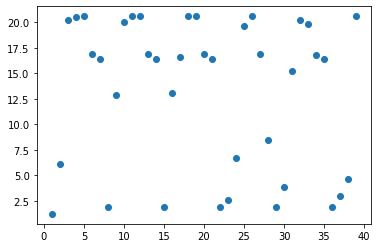

In [20]:
day = np.arange(1,40)
plt.scatter(day,people)

In [21]:
visitor = np.exp(test_output[0]) - 1

In [22]:
visitor.shape

(39, 821)

In [23]:
result = visitor.T.ravel()

In [24]:
result.shape

(32019,)

In [25]:
datetime = pd.date_range('2017-04-23',periods=39)
string_list = []
for i in range(len(data['air_store_id'])): #821
    for j in range(len(datetime)): #39
        string_list.append(data['air_store_id'][i]+'_'+datetime[j].strftime('%Y-%m-%d'))

In [26]:
string_list[32019-39:32019]

['air_fff68b929994bfbd_2017-04-23',
 'air_fff68b929994bfbd_2017-04-24',
 'air_fff68b929994bfbd_2017-04-25',
 'air_fff68b929994bfbd_2017-04-26',
 'air_fff68b929994bfbd_2017-04-27',
 'air_fff68b929994bfbd_2017-04-28',
 'air_fff68b929994bfbd_2017-04-29',
 'air_fff68b929994bfbd_2017-04-30',
 'air_fff68b929994bfbd_2017-05-01',
 'air_fff68b929994bfbd_2017-05-02',
 'air_fff68b929994bfbd_2017-05-03',
 'air_fff68b929994bfbd_2017-05-04',
 'air_fff68b929994bfbd_2017-05-05',
 'air_fff68b929994bfbd_2017-05-06',
 'air_fff68b929994bfbd_2017-05-07',
 'air_fff68b929994bfbd_2017-05-08',
 'air_fff68b929994bfbd_2017-05-09',
 'air_fff68b929994bfbd_2017-05-10',
 'air_fff68b929994bfbd_2017-05-11',
 'air_fff68b929994bfbd_2017-05-12',
 'air_fff68b929994bfbd_2017-05-13',
 'air_fff68b929994bfbd_2017-05-14',
 'air_fff68b929994bfbd_2017-05-15',
 'air_fff68b929994bfbd_2017-05-16',
 'air_fff68b929994bfbd_2017-05-17',
 'air_fff68b929994bfbd_2017-05-18',
 'air_fff68b929994bfbd_2017-05-19',
 'air_fff68b929994bfbd_2017-

In [27]:
df = pd.DataFrame(result, index = string_list,columns=['visitors'])

In [28]:
df.index.name = 'id'

In [29]:
df

,visitors
id,
air_00a91d42b08b08d9_2017-04-23,1.221419
air_00a91d42b08b08d9_2017-04-24,6.128161
air_00a91d42b08b08d9_2017-04-25,20.176830
air_00a91d42b08b08d9_2017-04-26,20.520889
air_00a91d42b08b08d9_2017-04-27,20.567987
...,...
air_fff68b929994bfbd_2017-05-27,4.821129
air_fff68b929994bfbd_2017-05-28,2.030544
air_fff68b929994bfbd_2017-05-29,1.945925


In [30]:
df.to_csv('result2.csv')